In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [49]:
#The seed is used to ensure that the model results can be replicated
import random # Randomness
sd = 231
np.random.seed(sd)

#Load datasets  

In [50]:
X= pd.read_csv('dfx.csv')
X.head()

,Pclass,Sex,Age,Parch,Mr,Miss,Mrs,Master,Social Worker,Millitary,Nobility
0,3,0,22.0,0,True,False,False,False,False,False,False
1,1,1,38.0,0,False,False,True,False,False,False,False
2,3,1,26.0,0,False,True,False,False,False,False,False
3,1,1,35.0,0,False,False,True,False,False,False,False
4,3,0,35.0,0,True,False,False,False,False,False,False


In [39]:
y= pd.read_csv('dfy.csv')
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Split data into training and testing sets

In [53]:
#Training set: 80%
#Testing set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train the model

In [55]:
#The MLP is trained with two hidden layers of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

#Predictions

In [56]:
y_pred = mlp.predict(X_test)

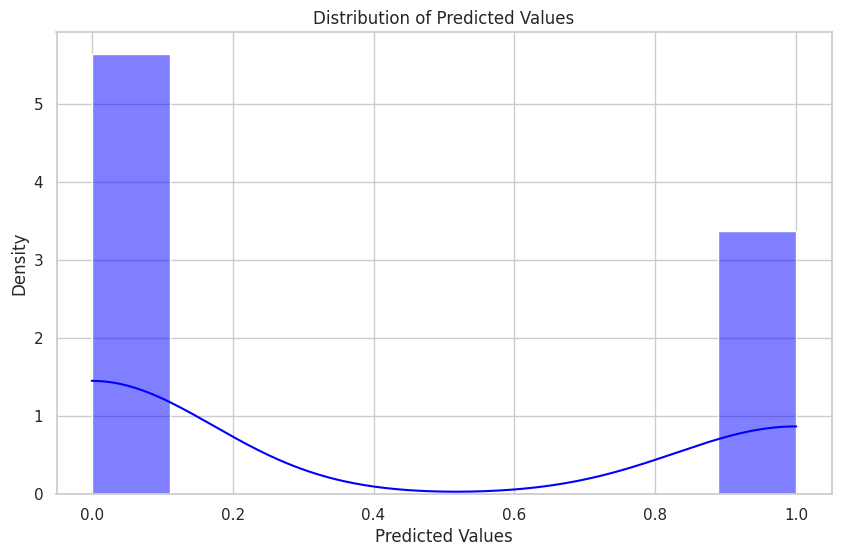

In [57]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(y_pred, color='blue', kde=True, stat="density")
plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.title('Distribution of Predicted Values')
plt.show()


# Evaluate the model

In [58]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[92 13]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

